## Introduction

#### This project is about using different information provided in AIS Maritime dataset and make a prediction on vesseltype. There are over 50 unique classes in Vesseltype feature. So It would be a multiclass classification problem. The sample dataset used from the 3 years of data. 

### What is AIS?
#### AIS is a maritime navigation safety communications system adopted by the International Maritime Organization (IMO) to provide vessel information, primarily for the purposes of maritime safety. AIS data provides a source of information which can be used to spatially represent vessel movements within the receiving range of transmissions.

#### The geographical position of a sample of 500000 data is shown below. All the position is based on vesseltype.
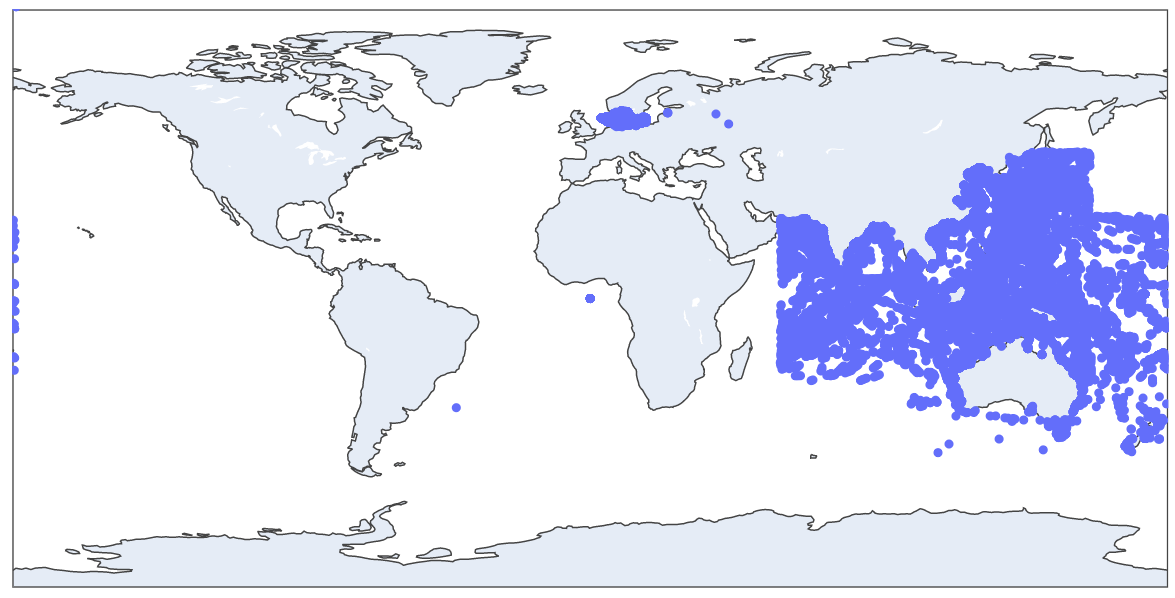

#### If we see the above plot carefully the concentration of data is around asia pacific, Indian ocean, Arabian Ocean and some part of Europe. This clearly shows that IMO used AIS specifically in this region in large number.

### Importing Libraries

Python provides a large number of libries which is helpful in data analysis and machine learning. Initially I'm importig 4 basic and most important libraries which are Pandas, NumPy, Matplotlib, and Seaborn. Pandas used for handling the panel data, preprocess, and cleaning it. Numpy is for numerical operation and using maths. Matplotlib and seaborn serves the purpose of data visualization.

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Maritime Data

In [3]:
#loading the dataset
df = pd.read_csv('AIS_Maritime_sample.csv')
df.head()

C:\Users\subzz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,14,17,19,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,cog,sog,beam,callsign,cargo,heading,imonumber,latitude,length,...,navstatus,timeoffix,vesseltype,date,Type of mobile,ROT,Type of position fixing device,Draught,Destination,Data source type
0,0,64.0,11.0,65.0,9V9123,0-AllShips,64.0,9532599.0,-25.420000,360.0,...,0-Underway(Engine),1607606344,7-Cargo,2020-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,1,65.4,12.1,65.0,9V9123,0-AllShips,64.0,9532599.0,-25.294915,360.0,...,0-Underway(Engine),1607611680,7-Cargo,2020-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2,323.0,14.1,35.0,V7QX3,0-AllShips,320.0,9813113.0,-24.770147,228.0,...,0-Underway(Engine),1607611196,7-Cargo,2020-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,3,339.8,19.8,32.0,HOMQ,0-AllShips,342.0,9536818.0,-24.511267,199.0,...,0-Underway(Engine),1607611210,7-Cargo,2020-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,4,337.8,10.7,32.0,V7JI6,0-AllShips,338.0,9712709.0,-25.042857,199.0,...,0-Underway(Engine),1607611211,7-Cargo,2020-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


### Getting Insights from Data

In this section I tried to find out basic but important information about this data. For example what is the shape of dataset, what and how many features are available in it, what are their datatype. If I found that any feature column is not so useful for the next process dropped it. Tried to check the statstical information like min, max, mean, 1st quartile and 3rd quartile.

In [4]:
#checking for shape 
df.shape

(1000000, 23)

In [5]:
#take out informations about each columns like count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unnamed: 0                      1000000 non-null  int64  
 1   cog                             1000000 non-null  float64
 2   sog                             1000000 non-null  float64
 3   beam                            920957 non-null   float64
 4   callsign                        926346 non-null   object 
 5   cargo                           164727 non-null   object 
 6   heading                         840290 non-null   float64
 7   imonumber                       998614 non-null   object 
 8   latitude                        1000000 non-null  float64
 9   length                          922892 non-null   float64
 10  longitude                       1000000 non-null  float64
 11  mmsi                            1000000 non-null  int64  
 12  n

In [6]:
#drop the unnecessary columns
df = df.drop(['Unnamed: 0','timeoffix','date'],axis=1)

In [7]:
#basic statistical information
df.describe()

,cog,sog,beam,heading,latitude,length,longitude,mmsi,ROT,Draught
count,1000000.00000,1000000.000000,920957.000000,840290.000000,1000000.000000,922892.000000,1000000.000000,1.000000e+06,669270.000000,699062.000000
mean,185.47295,4.349476,13.404992,181.126221,52.304640,75.042185,21.746498,2.733911e+08,-0.005357,5.250451
std,110.28688,6.557957,10.409763,102.834152,12.527291,72.251935,32.844104,1.075249e+08,6.241345,3.711336
min,-1.00000,-1.000000,0.000000,-1.000000,-104.524860,0.000000,-185.549357,0.000000e+00,-708.700000,0.200000
25%,83.30000,0.000000,6.000000,85.000000,54.935447,19.000000,9.736827,2.190064e+08,0.000000,2.800000
50%,210.60000,0.100000,10.000000,192.000000,55.855558,45.000000,10.923185,2.203590e+08,0.000000,4.600000
75%,273.30000,9.300000,18.000000,259.000000,57.121000,108.000000,12.654617,2.661480e+08,0.000000,6.600000
max,359.90000,191.000000,126.000000,510.000000,91.000000,1022.000000,181.000000,9.996660e+08,708.700000,25.500000


### Cleaning the data

Data Cleaning is one of the important part of data science project. Without a clean data we can't expect a model would provide good prediction. I noticed that there are few feure columns have negative values but they should not. As cog, sog and heading can't be negative, we have to remove all values less than zero.

Also, having null values in a raw data is really common thing but it is important that we must handle with them. Because null values have a huge impact on model performance. I noticed that both continuous and categorical features a large number of null values are present.

I decided to take different approach for different situations. Like if a coloumn has more than 40% of null values then will drop the entire fearure column. For target label,I won't fill the null values and create artificial data instead of that drop the rows with null values. For categorical features, I will use mode to fill and for continuous median.

In [8]:
#Replacing all the negative values rom cog, sog and heading
df['cog'] = df['cog'].apply(lambda x:0 if x <0 else x)
df['sog'] = df['sog'].apply(lambda x:0 if x <0 else x)
df['heading'] = df['heading'].apply(lambda x:0 if x <=0 else x)

In [9]:
#chaeck for null values in each feature in terms of percentage
df.isna().sum()/len(df)

cog                               0.000000
sog                               0.000000
beam                              0.079043
callsign                          0.073654
cargo                             0.835273
heading                           0.159710
imonumber                         0.001386
latitude                          0.000000
length                            0.077108
longitude                         0.000000
mmsi                              0.000000
name                              0.031261
navstatus                         0.000000
vesseltype                        0.003314
Type of mobile                    0.103997
ROT                               0.330730
Type of position fixing device    0.103997
Draught                           0.300938
Destination                       0.326471
Data source type                  0.103997
dtype: float64

In [10]:
#We will drop the cargo as it has 83% null values
df = df.drop(['cargo'],axis=1)

In [11]:
#for continues features
df = df.fillna(df.median())

C:\Users\subzz\AppData\Local\Temp/ipykernel_11468/3680941041.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [12]:
#Our target label is 'vesseltype' so instead of filling the null values we will drop the null values
df = df.dropna(subset = ['vesseltype'], how='all')

In [13]:
#for categorical features
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=df[column].fillna(df[column].mode()[0])

In [14]:
df.isna().sum()/len(df)

cog                               0.0
sog                               0.0
beam                              0.0
callsign                          0.0
heading                           0.0
imonumber                         0.0
latitude                          0.0
length                            0.0
longitude                         0.0
mmsi                              0.0
name                              0.0
navstatus                         0.0
vesseltype                        0.0
Type of mobile                    0.0
ROT                               0.0
Type of position fixing device    0.0
Draught                           0.0
Destination                       0.0
Data source type                  0.0
dtype: float64

## EDA

In this part of project, I will use data visualization methods using matplotlib and seaborn. Data Visualization helps to understand data in a better way like distribution, count, outliers, relation between 2 features and correlation among all features. I'll start with pair plot because it shows distibution and relation of all the continuous features. Then use hisrplot for histogram, heatmeap for correlation.

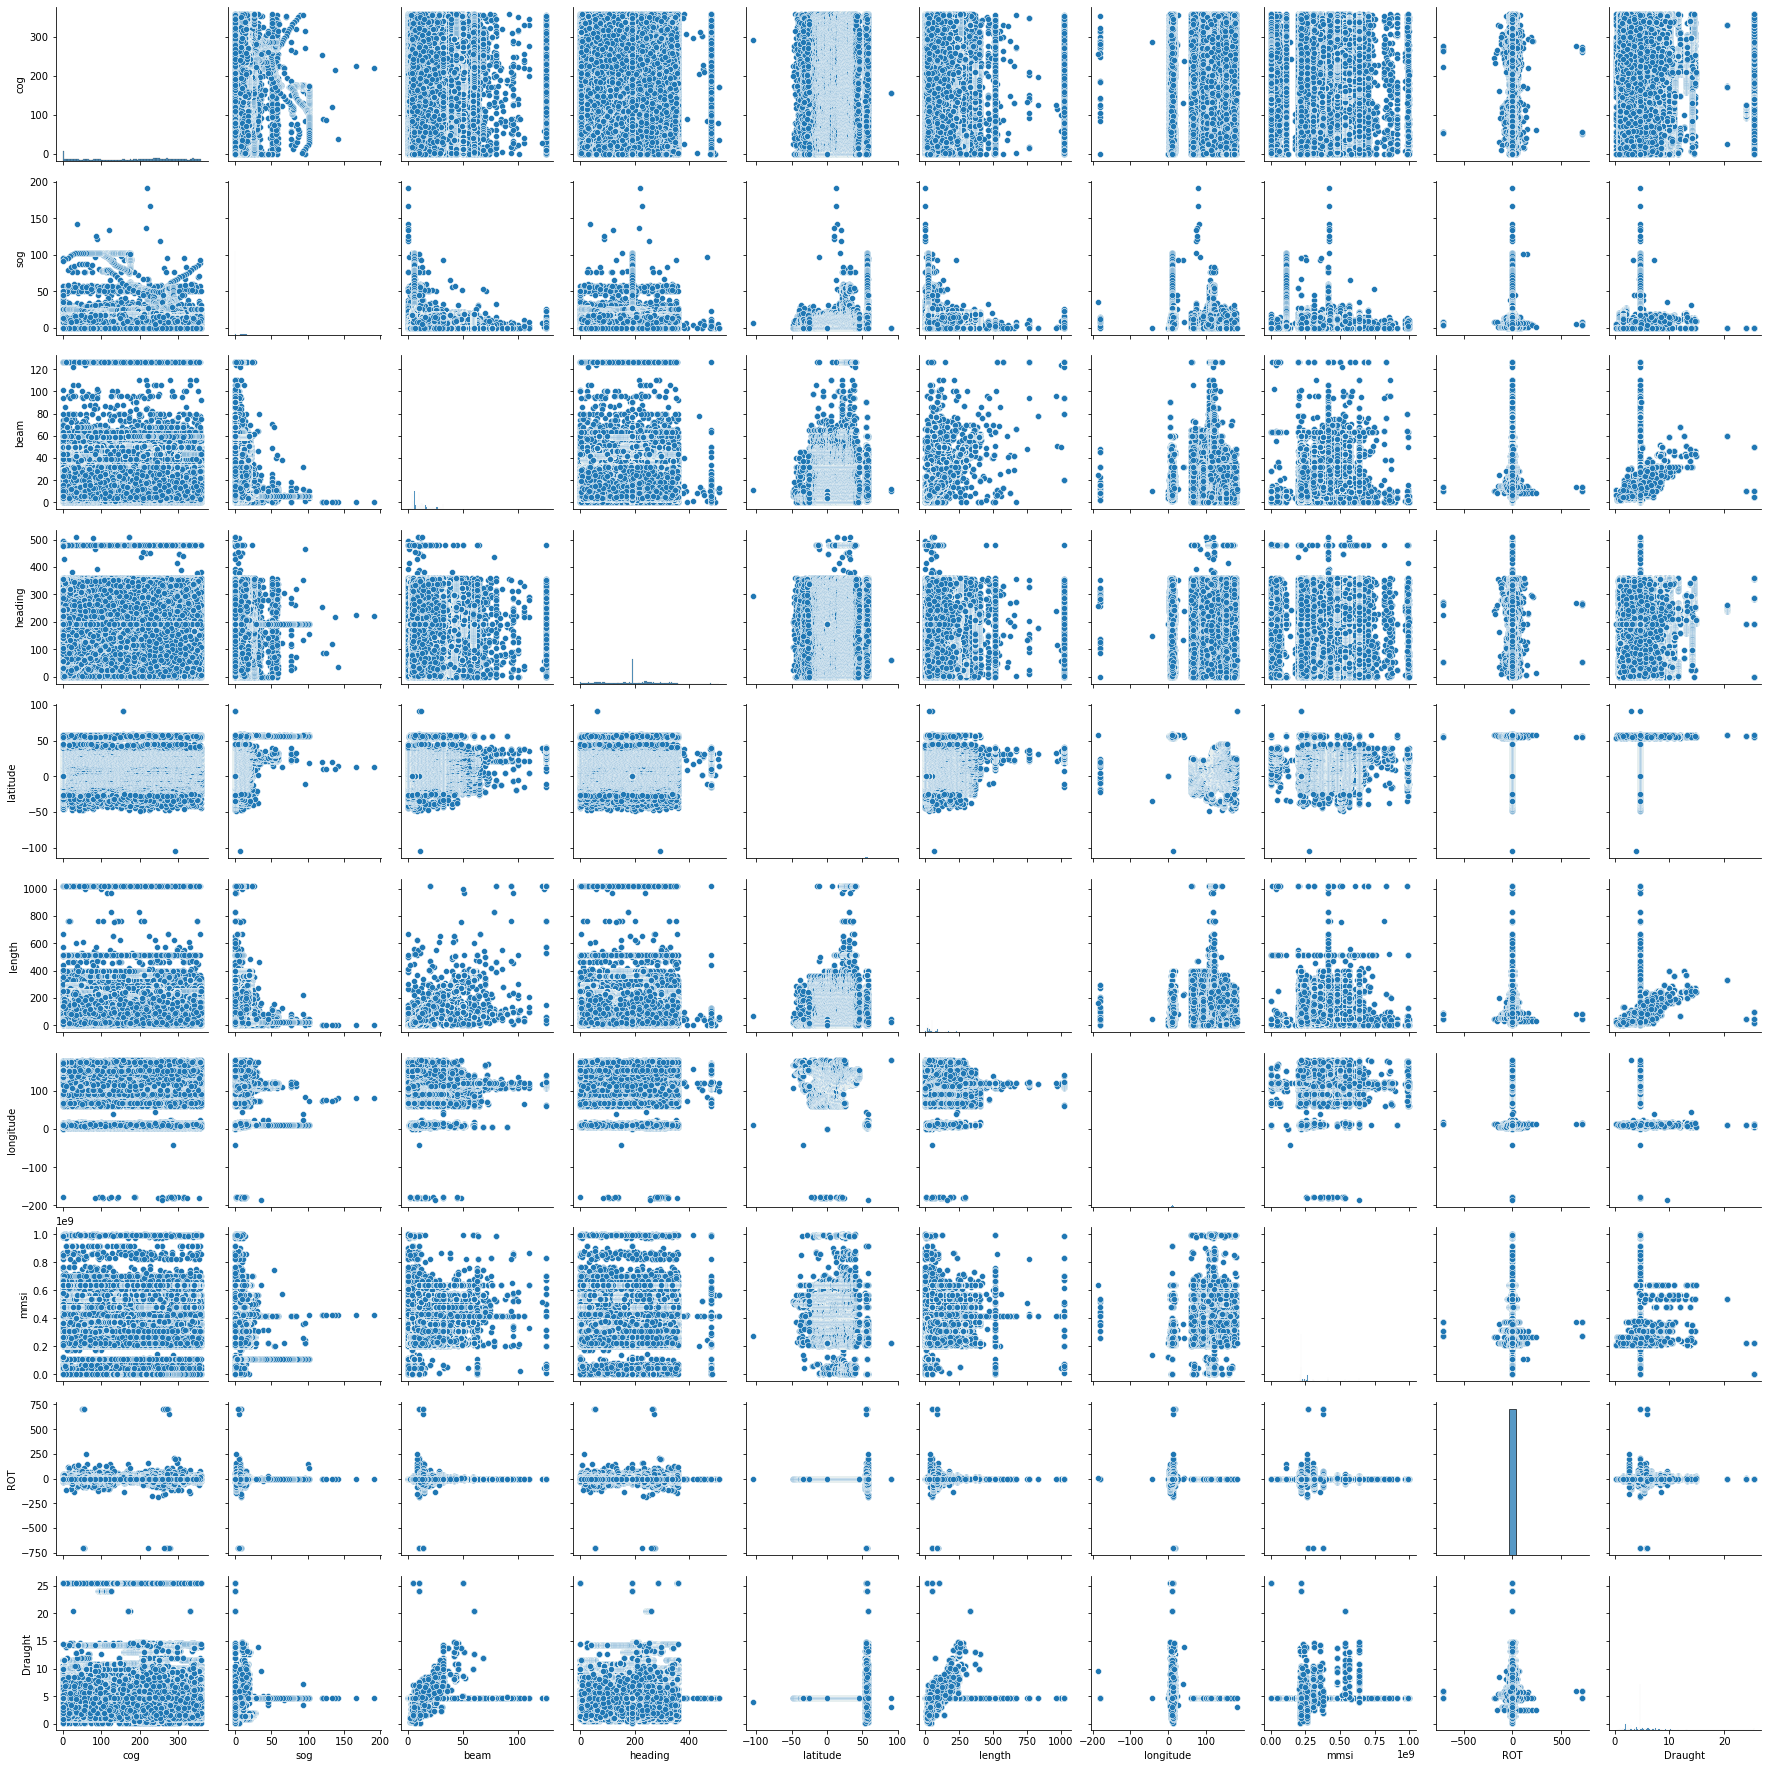

In [14]:
#using a common plot which will show distribution of all the features and realtion among them.
sns.pairplot(df)

<AxesSubplot:xlabel='Draught', ylabel='Count'>

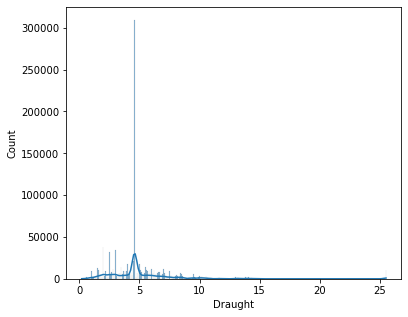

In [15]:
#distribution of draught
plt.figure(figsize=(6,5))
sns.histplot(df['Draught'],kde=True)

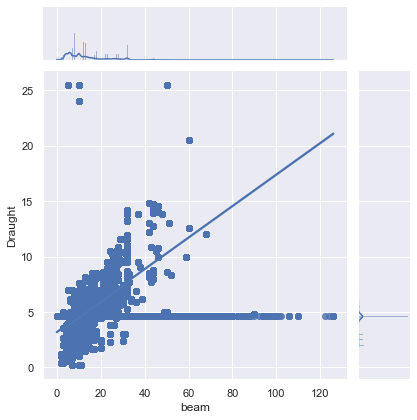

In [16]:
#relation between beam and draught
sns.set_theme(style="darkgrid")
sns.jointplot(x='beam',y='Draught',data=df,kind='reg')

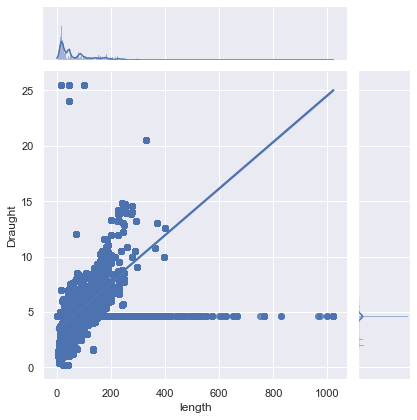

In [15]:
#relation between length and draught
sns.set_theme(style="darkgrid")
sns.jointplot(x='length',y='Draught',data=df,kind='reg')

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of mobile', ylabel='count'>

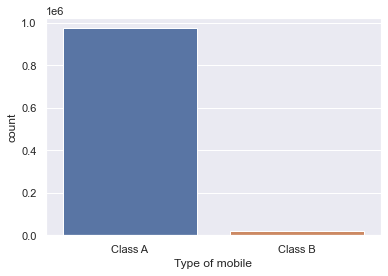

In [16]:
#checking the contribution of each mobile
sns.countplot(df['Type of mobile'])

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vesseltype', ylabel='count'>

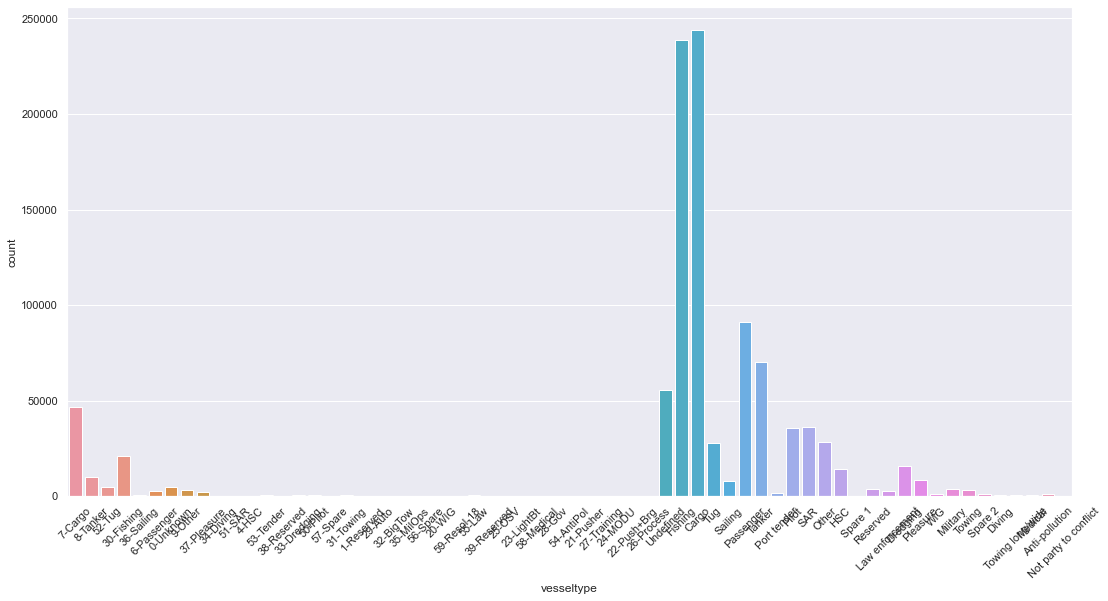

In [17]:
#let's see the count of all the categories in vesseltype
plt.figure(figsize=(18,9))
plt.tight_layout()
plt.xticks(rotation = 45)
sns.countplot(df['vesseltype'])

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='navstatus', ylabel='count'>

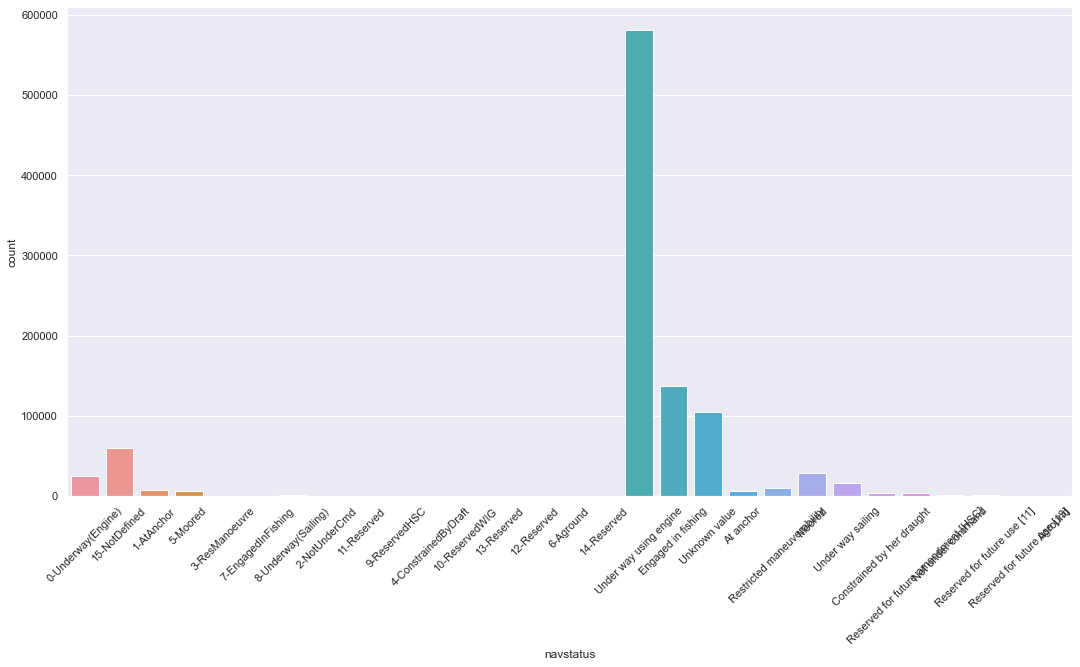

In [18]:
#let's see the count of all the categories in navstatus
plt.figure(figsize=(18,9))
plt.tight_layout()
plt.xticks(rotation = 45)
sns.countplot(df['navstatus'])

C:\Users\subzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Data source type', ylabel='count'>

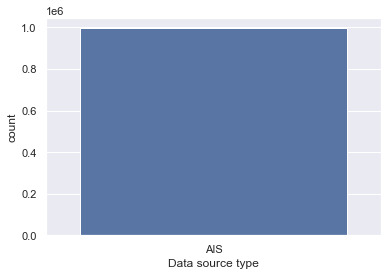

In [19]:
sns.countplot(df['Data source type'])

In [20]:
#Dropping the unnecessary features
df = df.drop(['Data source type'], axis=1)

In [21]:
df = df.drop(['callsign','imonumber'], axis=1)

<AxesSubplot:>

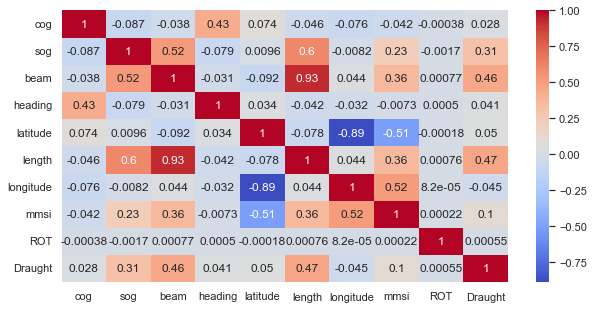

In [22]:
#Using heatmap to show the correlation among all the non categorical features.
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## Feature Engineering

In this section, I will try to transform the features in that form so can easily used in model training and testing. As initially I noticed that there are many categorical features present in data. A machine learning model is unable to read categorical feaures. So for that I need to transform the data by encoding method. It will assign a number to each unique value and it will be easier for model to read the data.

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
#changing the categorical columns using label enoder. It will assign a unique number to each category in same column
df['name'] = le.fit_transform(df['name'])
df['navstatus'] = le.fit_transform(df['navstatus'])
df['Type of position fixing device'] = le.fit_transform(df['Type of position fixing device'])
df['vesseltype'] = le.fit_transform(df['vesseltype'])
df['Type of mobile'] = le.fit_transform(df['Type of mobile'])
df['Destination'] = le.fit_transform(df['Destination'])

In [17]:
df.head()

,cog,sog,beam,callsign,heading,imonumber,latitude,length,longitude,mmsi,name,navstatus,vesseltype,Type of mobile,ROT,Type of position fixing device,Draught,Destination,Data source type
0,64.0,11.0,65.0,9V9123,64.0,9532599.0,-25.420000,360.0,84.633333,563950000,51401,0,34,0,0.0,3,4.6,157,AIS
1,65.4,12.1,65.0,9V9123,64.0,9532599.0,-25.294915,360.0,84.933403,563950000,51401,0,34,0,0.0,3,4.6,157,AIS
2,323.0,14.1,35.0,V7QX3,320.0,9813113.0,-24.770147,228.0,106.331890,538008009,5085,0,34,0,0.0,3,4.6,157,AIS
3,339.8,19.8,32.0,HOMQ,342.0,9536818.0,-24.511267,199.0,111.501532,371158000,10971,0,34,0,0.0,3,4.6,157,AIS
4,337.8,10.7,32.0,V7JI6,338.0,9712709.0,-25.042857,199.0,111.283643,538006056,39157,0,34,0,0.0,3,4.6,157,AIS


In [18]:
df.columns

Index(['cog', 'sog', 'beam', 'callsign', 'heading', 'imonumber', 'latitude',
       'length', 'longitude', 'mmsi', 'name', 'navstatus', 'vesseltype',
       'Type of mobile', 'ROT', 'Type of position fixing device', 'Draught',
       'Destination', 'Data source type'],
      dtype='object')

In [19]:
#suffling the columns
df = df[['cog', 'sog', 'beam', 'heading', 'latitude', 'length', 'longitude',
       'mmsi', 'name', 'navstatus', 'Type of mobile', 'ROT',
       'Type of position fixing device', 'Draught', 'Destination', 'vesseltype']]

## Splitting the data

In a data science project, it is necessary to split the data for training and testing. We can not rely on the training result only. That's why here I will split the data into 2 parts. One will be used for tarining and validation and other part will be used for final testing. 

In [20]:
df.shape

(996686, 16)

In [21]:
#splitting the data in 2 parts. One is for training and testing of algorithms and other one is to test final model
Final_train_df = df[:896686]
Final_test_df = df[896686:]

## Train Test Split

Here I will use the training data and split into 2 parts, one for training and other for validation. Train test split method is provided by scikit learn library. It divide the data into 2 parts accoding to our need. But before that I need to define what is my independent feature data and what is target. 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = Final_train_df.drop(['vesseltype'],axis=1)
y = Final_train_df['vesseltype']

In [24]:
#splitting the data into train and test for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model creation and prediction

In this part of project, we finally use our preprocessed data for tarining the model. I will use 3-4 different algorithms for classification problem and then compare their performance. After that the best model will be used for final testing. 

### Logistic Regression

In [25]:
#importing the logistic regression algorithm because this work really well for classification. 
#But have to see that if it wil work on multiclass or not.
from sklearn.linear_model import LogisticRegression

In [26]:
lrc = LogisticRegression()
lrc.fit(X_train,y_train)

C:\Users\subzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
pred_lc = lrc.predict(X_test)

In [28]:
#importing the metrics for tsting model performance
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
#performance of logistic regression
print(classification_report(y_test,pred_lc))
print('\n')
print(confusion_matrix(y_test,pred_lc))

C:\Users\subzz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subzz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subzz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1626
           1       0.00      0.00      0.00       117
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00        46
          12       0.00      0.00      0.00      6855
          13       0.00      0.00      0.00       205
          14       0.00      0.00      0.00        79
          15       0.00      0.00      0.00       253
          16       0.00      0.00      0.00        40
          17       0.00      0.00      0.00        24
          18       0.00    

The above result is not that shocking. As we know that we have over 50 classes in our target label and logistic regression works on sigmoid function. So it was a hard task for logistic regression to do.

### Random Forest Classifier

In [30]:
#importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
prediction = rfc.predict(X_test)

In [33]:
#performance of random forest classifier
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

C:\Users\subzz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subzz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subzz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1626
           1       0.89      0.36      0.51       117
           2       0.92      0.35      0.51        34
           3       1.00      0.29      0.44         7
           4       0.00      0.00      0.00         8
           5       1.00      0.60      0.75         5
           6       0.50      1.00      0.67         1
           7       1.00      0.50      0.67         2
           9       1.00      0.50      0.67         4
          10       1.00      0.25      0.40         4
          11       0.95      0.39      0.55        46
          12       0.89      0.96      0.93      6855
          13       0.94      0.44      0.60       205
          14       0.92      0.43      0.59        79
          15       0.90      0.59      0.72       253
          16       1.00      0.53      0.69        40
          17       1.00      0.50      0.67        24
          18       0.85    

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

# # Fit the grid search model
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

### XGBoost Classifier

In [51]:
#installing xgboost library
!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [34]:
#importing xgBoost
import xgboost as xgb

In [35]:
xgb_c = xgb.XGBClassifier()

In [36]:
#fitting the train data so model can learn about it
xgb_c.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [37]:
#testing of model
pred = xgb_c.predict(X_test)

In [38]:
#model performance
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

C:\Users\subzz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subzz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subzz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.47      0.55      0.51      1626
           1       0.00      0.00      0.00       117
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00        46
          12       0.76      0.78      0.77      6855
          13       0.00      0.00      0.00       205
          14       0.00      0.00      0.00        79
          15       0.00      0.00      0.00       253
          16       0.00      0.00      0.00        40
          17       0.00      0.00      0.00        24
          18       0.18    

As overall performance of Random forest is better than xgboost, I make random forest model my final model

### Dump the model, so we can use it later for test data

After finalizing the model, all I need to do is to pickled the model for further use. I can use it anytime with same kind of data. I will not have to train the model again. That will save a lot of computation cost.

In [39]:
import pickle

file_name = 'AIS_Maritime.sav'
pickle.dump(rfc, open(file_name, 'wb'))

## Final Testing

This is the final step of this project. All I need to do is use the finalized model, load it and pass the testing data to it. And then compare the final result.

In [40]:
#splitting the inal test data into features and target lable.
X_test_final = Final_test_df.drop(['vesseltype'],axis=1)
y_test_final = Final_test_df['vesseltype']

In [41]:
#load the model and use it for final testing
model = pickle.load(open('AIS_Maritime.sav', 'rb'))

In [42]:
#final prdiction
final_pred = model.predict(X_test_final)

In [43]:
#Let's see the performance of model using classification report and confusion matrix
print(classification_report(y_test_final,final_pred))
print('\n')
print(confusion_matrix(y_test_final,final_pred))

              precision    recall  f1-score   support

          37       1.00      1.00      1.00       147
          38       1.00      1.00      1.00     27912
          39       1.00      1.00      1.00       102
          40       1.00      1.00      1.00      1786
          41       1.00      1.00      1.00     27239
          42       1.00      1.00      1.00      1658
          43       1.00      1.00      1.00       320
          44       1.00      1.00      1.00        96
          45       1.00      1.00      1.00       432
          46       1.00      1.00      1.00         8
          47       1.00      1.00      1.00      3214
          48       1.00      1.00      1.00     10517
          49       1.00      1.00      1.00      4523
          50       1.00      1.00      1.00       998
          51       1.00      1.00      1.00       193
          52       1.00      1.00      1.00       452
          53       1.00      1.00      1.00      4197
          54       1.00    

It seems our model performed exceptionally well on test data with 100% accuracy.

## Combining the prediction with Independent features

In this section, I will combine my final result with the dataframe to compare visually the result. Also I'll use inverse lable encoder to bring back vesseltype and prediction into original form.

In [44]:
#reset the index before concating
result_df = Final_test_df.reset_index()

In [45]:
#transforming the prediction which is in series into dataframe.
result = pd.DataFrame(final_pred,columns=['vesseltype_pred'])

In [47]:
#joining the main datset with the prediction
df_subm = pd.concat([result_df,result], axis=1)

In [49]:
#transforming the vesseltype and prediction into orginal form using inverse label encoder
df_subm['vesseltype']= le.inverse_transform(df_subm['vesseltype'])
df_subm['vesseltype_pred']= le.inverse_transform(df_subm['vesseltype_pred'])

In [50]:
df_subm.head()

,index,cog,sog,beam,heading,latitude,length,longitude,mmsi,name,navstatus,Type of mobile,ROT,Type of position fixing device,Draught,Destination,vesseltype,vesseltype_pred
0,900000,247.8,0.0,4.0,192.0,55.329075,13.0,10.967493,235088102,35934,27,0,0.0,3,0.6,606,ASSENS,ASSENS
1,900001,229.7,0.0,5.0,180.0,55.471753,15.0,8.424263,219000647,7868,27,0,0.0,3,2.0,157,BAG GB BAG,BAG GB BAG
2,900002,343.2,0.0,8.0,347.0,56.704372,26.0,8.224098,219794000,30993,27,0,0.0,3,3.6,656,BERGEN VIA RISAVIKA,BERGEN VIA RISAVIKA
3,900003,57.8,13.9,19.0,59.0,55.801528,128.0,7.748612,255801580,3182,27,0,0.0,3,5.4,141,ANTWERPEN,ANTWERPEN
4,900004,197.4,0.0,6.0,277.0,56.929175,18.0,12.352698,266057000,9888,27,0,0.0,3,3.3,241,ASNAES,ASNAES


## Conclusion

From this particular project I found out many insights. Some areas follow:
1. There are many independent features which are highly positive and negative correlated with each other. That's called multicollinearity. If our aim is just prediction then we can ignore that. Else we can drop either of the feature.

2. The imbalnce of data has seen clearly like 'types of mobile', 'navstatus' and even in 'vesseltype'. Our model worked well on that else we wold need to use oversampling.

3. Using Label encoder was the right decision. As most of the categorical features had lot of categories. And if we would had used onehot encoder then there would be hundreds of columns. But label encoder handled this case really well.

4. As we noticed how logistic regression model performed poorly on this data. So, there is 2 suggestion, one always standardized or normalize the data before using in non-tree based model. And other one is logistic regress works well on 2 classes not on 50+.

5. I did not use Decision tree model here. Normally DT works really well on this kind of data but there is always a problem of overfitting in it. To reduce that we need to do pre-pruning or post-pruning. Overall that would be a time consumimg process.

6. The reasons behind the performance of Random Forest Classifier are a lot. Like Random Forest is robust to outliers. It creates many sub-models. The data is distributed randomly to each model. All the sub-models work parallelly and provide answer in aggregation form.  It works really well even the data is nonlinear. There is a very low chance of overfitting. And the biggest thing, it works really well on large dataset. 

7. The overall performance of XGBosst was not bad but it was not like random forest because each sub-model work in series. They are focused in solving one specific error and passed to another sub-model. But it is hard to tune and always has a possibility of overfitting.  

8. I could also use the K-Nearest Neighbour for this dataset. It is known for getting low bias and low variance but it has a biggest drawback that it does not work well on large dataset. And That’s why I did not use this algorithm. 